In [174]:
def wordle_score(guess,answer):
    # find incorrect letters
    wrong_g = []
    wrong_a = []
    for index, letter in enumerate(guess):
        if answer[index] != letter:
            wrong_g.append([index,letter])
            wrong_a.append([index,answer[index]])
            
    yellow_idx = []
    for index, elem in enumerate(wrong_g):
        # if elem has a corresponding letter in wrong_a, it's a mismatch. 
        # We should delete the wrong_a element so we don't count it in the future
        for a_i, ans in enumerate(wrong_a):
            if elem[1] == ans[1]:
                yellow_idx.append(wrong_g[index][0])
                wrong_a.pop(a_i)
    
    score = ""
    for index, letter in enumerate(guess):
        if answer[index] == letter:
            score += "🟩"
        elif index in yellow_idx:
            score += "🟨"
        else:
            score += "⬜"
    return score

def score_to_val(score):
    val = 0
    for i, e in enumerate(score):
        if e == "🟩":
            val += 3**i
        if e == "🟨":
            val += 2**i
    return val
            

In [201]:
print(wordle_score("AAA","ABA"))
print(wordle_score("ABC","CBA"))
print(wordle_score("AXPPE","APPLE"))
print(wordle_score("AAAABBBB","BBAACCCC"))

🟩⬜🟩
🟨🟩🟨
🟩⬜🟩🟨🟩
⬜⬜🟩🟩🟨🟨⬜⬜


In [204]:
import itertools
import pandas as pd
def generate_all_numwords(base,length):
    my_list = []
    for item in itertools.product(range(base),repeat=length):
        my_list.append(item)
        
    return my_list

def generate_matrix(base,length):
    my_list = generate_all_numwords(base,length)
    print("Generated all permutations...")
    print("Length: " + str(len(my_list)))
    answer = []
    for indx, e1 in enumerate(list(my_list)):
        s = []
        for e2 in list(my_list):
            s.append(score_to_val(wordle_score(e1,e2)))
        answer.append(list(s))
    return pd.DataFrame(answer,columns=my_list,index=my_list)

Generated all permutations...
Length: 9


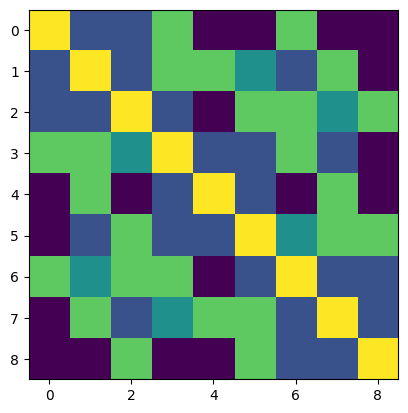

In [258]:
import matplotlib.pyplot as plt

im1 = plt.imshow(generate_matrix(3,2),norm='linear')

In [ ]:
generate_matrix(3,2)